In [66]:
import json

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False  # https://stackoverflow.com/questions/43102564/matplotlib-negative-numbers-on-tick-labels-displayed-as-boxes
plt.style.use('seaborn-ticks')  # 'seaborn-ticks'
import numpy as np
import seaborn as sns 

In [298]:
data.loc[data['molec_class'] == 'AC']

,unique_id,RT,m/z,adduct,Type,polarity,ID,molec_class,superclass,1102_8_RBG,...,model_param_ogtt,model_param_sampling[T.RBG]:ogtt,qval_fed,qval_fasted,pval_fed,coef_fed,intercept_fed,pval_fasted,coef_fasted,intercept_fasted
i,,,,,,,,,,,,,,,,,,,,,
l_37,AC 16:0_1.697_400.34232,1.697,400.34232,NaN,lipid,+,AC 16:0,AC,Fatty Acyl,18.635452,...,-0.000017,0.000006,0.357777,0.047371,0.252562,-0.000011,20.190747,0.006776,-0.000017,22.811865
l_43,AC 18:1_1.884_426.35785,1.884,426.35785,NaN,lipid,+,AC 18:1,AC,Fatty Acyl,19.212520,...,-0.000018,0.000008,0.398412,0.063471,0.289200,-0.000010,20.834067,0.011106,-0.000018,23.330983
l_64,AC 18:0_2.814_428.37366,2.814,428.37366,NaN,lipid,+,AC 18:0,AC,Fatty Acyl,18.843406,...,-0.000013,0.000009,0.671863,0.085044,0.568321,-0.000004,19.953520,0.017654,-0.000013,21.319291


In [297]:
[x for x in data.loc[(data['Type'] == 'metabolite') & (data['ID'] != 'unknown'), 'ID']]

['Urocanic acid',
 'Uridine',
 'Uric acid',
 'Tyrosine',
 'Tryptophan',
 'Trigonelline',
 'Indole-3-acrylic acid',
 'Threonine',
 'Threonic acid',
 'Taurine',
 'Stachydrine',
 'Serine',
 'Ribose',
 'Quinic acid',
 'Pyroglutamic acid',
 'Pseudouridine',
 'Proline',
 'Pipecolic acid',
 'Phenylalanine',
 'Phenylacetylglycine',
 'Pentose sugar',
 'Ornithine',
 'Nicotinamide 1-oxide',
 'Nicotinamide',
 'N6,N6,N6-Trimethyl-L-lysine',
 'N3,N4-Dimethyl-L-arginine',
 'N-Methyl-2-pyrrolidone',
 'N-Isovalerylglycine',
 'N-Acetylornithine',
 'N-Acetylneuraminic acid',
 'Pyroglutamic acid',
 'N-Acetyl-L-aspartic acid',
 'Methylhistidine',
 'Methylaminopyrimidine',
 'Leucine',
 'Lactic Acid',
 'Isoleucine',
 'Hydroxycinnamic acid',
 'Hydrocinnamic acid',
 'Histidine',
 'Hippuric acid',
 'Iditol',
 'Hexose sugar',
 'Guanidinosuccinic acid',
 'Glyceric acid',
 'Glutamine',
 'Glutamic acid',
 'Glucose',
 'Gluconic acid',
 'Ethyl-beta-D-glucuronide',
 'Ergothioneine',
 'Cytidine',
 'Creatinine',
 'Creat

In [240]:
# colors and class-superclass maps
with open(r'..\data\metadata\color_schemes.json') as infile:
    colors = json.load(infile, parse_int=True)
    
data = pd.read_csv(r'../data/processed/combined_metabolites_data_with_model_params.csv').set_index('i')
data_cols = data.filter(regex='_FBG|_RBG').columns
fbg_cols = data.filter(regex='_FBG').columns
rbg_cols = data.filter(regex='_RBG').columns

ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)
fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

In [156]:
data['signif_interaction'] = data['qval_sampling:ogtt'] < 0.05
data['signif_sampling'] = data['qval_sampling'] < 0.05

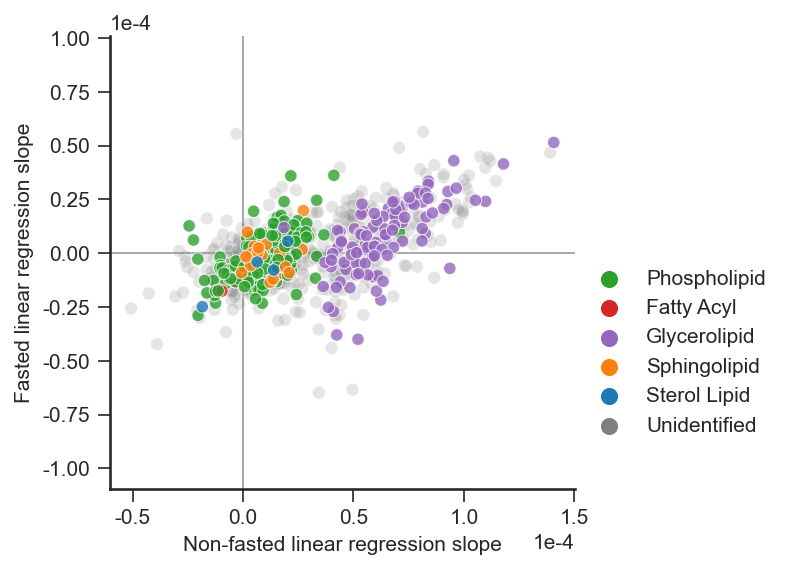

In [164]:
fig, ax = plt.subplots(figsize=(4,4), dpi=150)
sns.scatterplot(
    data=data.loc[(data['superclass'] != 'Unidentified') & (data['Type'] == 'lipid')],
    x='coef_fed', y='coef_fasted', hue='superclass', ax=ax, palette=colors,
    alpha=0.8, 
#     style='signif_interaction', markers={True: 's', False: '*'}
)
sns.scatterplot(
    data=data.loc[(data['superclass'] == 'Unidentified') & (data['Type'] == 'lipid')],
    x='coef_fed', y='coef_fasted', hue='superclass', ax=ax, palette=colors,
    alpha=0.2, zorder=-10, 
#     style='signif_interaction', markers={True: 's', False: '*'}
)

###### 2 options for making sure the axes are equally scaled to not bias against non-fasted:
########## 1. ax.set_aspect('equal') enforces square, but distorts plot
########## 2. ylim average +/- 0.5 * xlim range 
# ax.set_aspect('equal')

avg_ylim = np.mean([y for y in ax.get_ylim()])
xlim_range = abs(ax.get_xlim()[0] - ax.get_xlim()[1])
ax.set_ylim(avg_ylim-0.5*xlim_range, avg_ylim+0.5*xlim_range)

ax.set_ylabel('Fasted linear regression slope')
ax.set_xlabel('Non-fasted linear regression slope')

ax.ticklabel_format(style='sci', scilimits=(-1, 1))
ax.axvline(0, c='gray', linewidth=0.8, alpha=0.8, zorder=-99)
ax.axhline(0, c='gray', linewidth=0.8, alpha=0.8, zorder=-99)
ax.legend(loc=(1.01, 0.1), markerscale=1.2)
sns.despine()

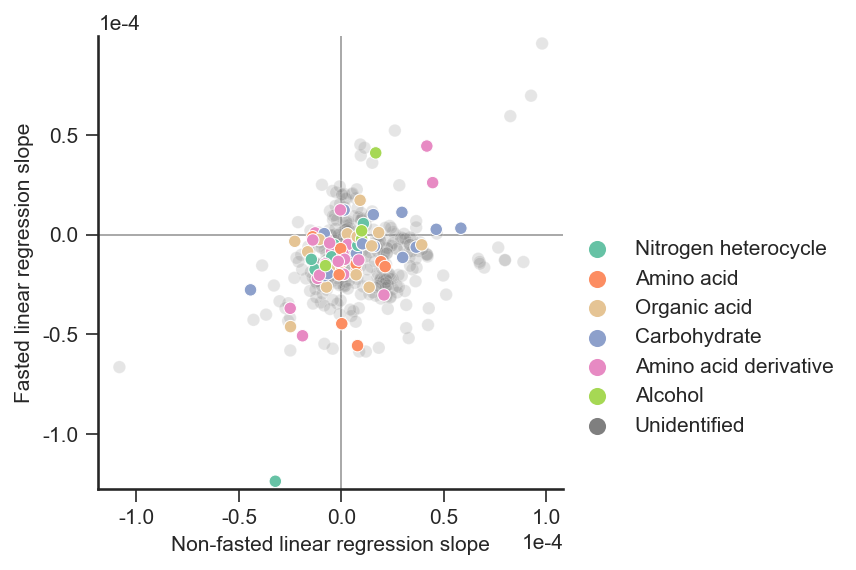

In [71]:
fig, ax = plt.subplots(figsize=(4,4), dpi=150)
sns.scatterplot(
    data=data.loc[(data['superclass'] != 'Unidentified') & (data['Type'] == 'metabolite')],
    x='coef_fed', y='coef_fasted', hue='superclass', ax=ax, palette=colors,
    alpha=1
)
sns.scatterplot(
    data=data.loc[(data['superclass'] == 'Unidentified') & (data['Type'] == 'metabolite')],
    x='coef_fed', y='coef_fasted', hue='superclass', ax=ax, palette=colors,
    alpha=0.2, zorder=-10
)

###### 2 options for making sure the axes are equally scaled to not bias against non-fasted:
########## 1. ax.set_aspect('equal') enforces square, but distorts plot
########## 2. ylim average +/- 0.5 * xlim range 
# ax.set_aspect('equal')

avg_ylim = np.mean([y for y in ax.get_ylim()])
xlim_range = abs(ax.get_xlim()[0] - ax.get_xlim()[1])
ax.set_ylim(avg_ylim-0.5*xlim_range, avg_ylim+0.5*xlim_range)

ax.set_ylabel('Fasted linear regression slope ')
ax.set_xlabel('Non-fasted linear regression slope')

ax.ticklabel_format(style='sci', scilimits=(-1, 1))
ax.axvline(0, c='gray', linewidth=0.8, alpha=0.8, zorder=-99)
ax.axhline(0, c='gray', linewidth=0.8, alpha=0.8, zorder=-99)
ax.legend(loc=(1.01, 0.1), markerscale=1.2)
sns.despine()

# Volcano plots

In [213]:
df = data[data_cols].T.copy()
df = (df
    .join(fg['bg_type'])
    .groupby('bg_type')
    .mean()
     )
fc = ((df.loc['RBG'] - df.loc['FBG'])
      .to_frame('Log2 Fold Change')
#       .join(-np.log10(data[['qval_sampling', 'qval_ogtt', 'qval_sampling:ogtt']]))
      .join(data[['qval_sampling', 'qval_ogtt', 'qval_sampling:ogtt', 
                  'superclass', 'coef_fasted', 'coef_fed', 'model_param_ogtt', 'Type']])
     )
fc['Fed - Fasted slope'] = fc['coef_fed'] - fc['coef_fasted']
fc['signif_sampling'] = fc['qval_sampling'] < 0.05
fc['signif_interact'] = fc['qval_sampling:ogtt'] < 0.05
fc['log_qval_sampling'] = -np.log10(fc['qval_sampling'])
fc['log_qval_ogtt'] = -np.log10(fc['qval_ogtt'])
fc['log_qval_sampling:ogtt'] = -np.log10(fc['qval_sampling:ogtt'])
fc['is_id'] = fc['superclass'] != 'Unidentified'
fc

,Log2 Fold Change,qval_sampling,qval_ogtt,qval_sampling:ogtt,superclass,coef_fasted,coef_fed,model_param_ogtt,Type,Fed - Fasted slope,signif_sampling,signif_interact,log_qval_sampling,log_qval_ogtt,log_qval_sampling:ogtt,is_id
m_0,0.278770,6.086023e-01,0.000230,0.631782,Unidentified,6.955843e-05,0.000093,6.955843e-05,metabolite,0.000023,False,False,0.215666,3.638101,0.199433,False
m_1,0.877417,2.768886e-10,0.002792,0.000126,Unidentified,-6.598915e-06,0.000037,-6.598915e-06,metabolite,0.000044,True,True,9.557695,2.554058,3.898589,False
m_2,-0.331312,1.823227e-01,0.657168,0.685202,Nitrogen heterocycle,-6.092323e-07,-0.000010,-6.092324e-07,metabolite,-0.000009,False,False,0.739159,0.182324,0.164181,True
m_3,-0.712096,1.263455e-10,0.085332,0.537969,Nitrogen heterocycle,-9.615231e-06,-0.000004,-9.615231e-06,metabolite,0.000005,True,False,9.898440,1.068887,0.269242,True
m_4,0.780719,4.025503e-01,0.040372,0.259251,Nitrogen heterocycle,-1.235729e-04,-0.000032,-1.235729e-04,metabolite,0.000091,False,False,0.395180,1.393920,0.586280,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l_868,0.511175,1.446566e-02,0.003268,0.006008,Glycerolipid,2.209285e-07,0.000051,2.209284e-07,lipid,0.000051,True,True,1.839662,2.485729,2.221285,True
l_869,0.612111,7.182245e-02,0.400770,0.005990,Unidentified,-2.865160e-05,0.000054,-2.865160e-05,lipid,0.000083,False,True,1.143740,0.397105,2.222574,False
l_870,-1.423496,1.166334e-08,0.278988,0.005976,Unidentified,-1.689329e-05,0.000038,-1.689329e-05,lipid,0.000055,True,True,7.933177,0.554414,2.223560,False
l_871,-1.735587,2.516624e-10,0.163718,0.003464,Unidentified,-1.695555e-05,0.000045,-1.695555e-05,lipid,0.000062,True,True,9.599182,0.785903,2.460408,False


In [184]:
def volcano(x, y, df, metab_type, alpha=0.8):
    fig, ax = plt.subplots(figsize=(4,4), dpi=100)
    sns.scatterplot(
        data=df.loc[(df['superclass'] != 'Unidentified') & (fc['Type'] == metab_type)], 
        x=x, y=y,
        hue='superclass', palette=colors, ax=ax, alpha=alpha,
    )
    sns.scatterplot(
        data=df.loc[(df['superclass'] == 'Unidentified') & (fc['Type'] == metab_type)], 
        x=x, y=y,
        hue='superclass', palette=colors, ax=ax, alpha=0.3, zorder=-10
    )
    ax.ticklabel_format(style='sci', scilimits=(-2, 2))
    ax.set_ylabel('-log10(q-value)')
    ax.legend(loc=(1.01, 0.1), markerscale=1.2)
    ax.set_title(y)
    ax.axvline(0, linewidth=1, c='0.5', zorder=-99)
    ax.axhline(-np.log10(0.05), linewidth=1, c='0.5', zorder=-99)
    sns.despine()
    return fig, ax

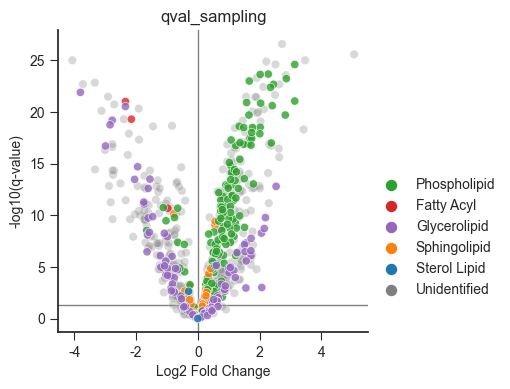

In [185]:
fig, ax = volcano(x='Log2 Fold Change', y='qval_sampling', df=fc, metab_type='lipid')

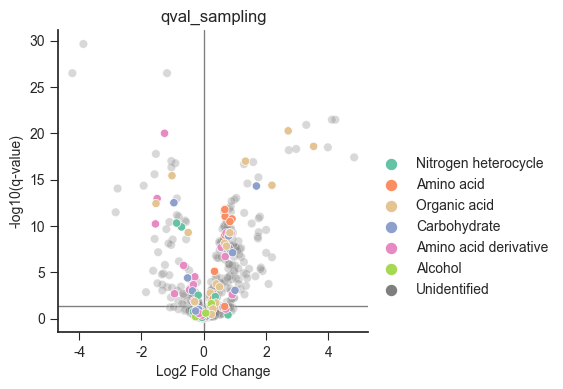

In [168]:
fig, ax = volcano(x='Log2 Fold Change', y='qval_sampling', df=fc, metab_type='metabolite', alpha=1)

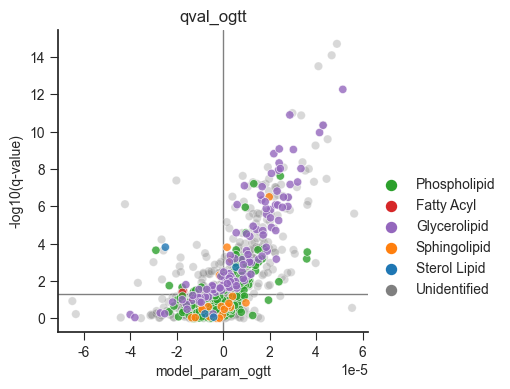

In [169]:
## This one looks weird because the x-axis is usually effect size. Effect size for OGTT LRT is unclear...

fig, ax = volcano(x='model_param_ogtt', y='qval_ogtt', df=fc, metab_type='lipid')

Text(0.5, 0, 'Non-fasted - Fasted slope')

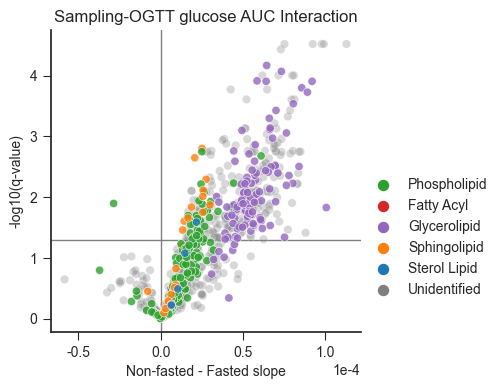

In [170]:
fig, ax = volcano(x='Fed - Fasted slope', y='qval_sampling:ogtt', df=fc, metab_type='lipid')
ax.set_title('Sampling-OGTT glucose AUC Interaction')
ax.set_xlabel('Non-fasted - Fasted slope')

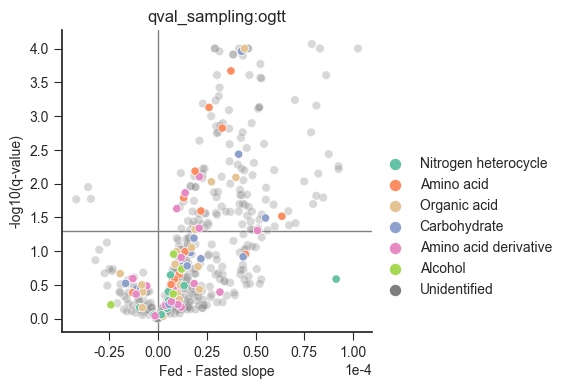

In [150]:
fig, ax = volcano(x='Fed - Fasted slope', y='qval_sampling:ogtt', df=fc, metab_type='metabolite', alpha=1)

# p-value vs. p-value plots

In [ ]:
relplot.

In [255]:
type(relplot.legend)

matplotlib.legend.Legend

In [293]:
type(legend)

matplotlib.legend.Legend

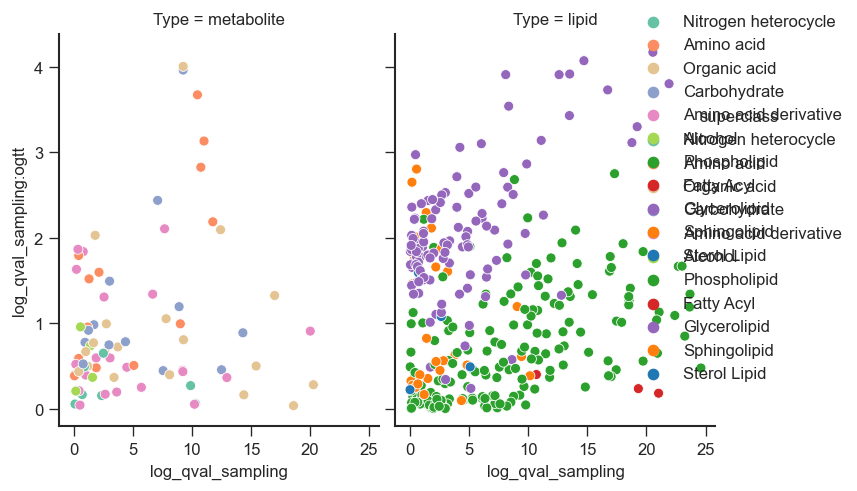

In [292]:
relplot = sns.relplot(
    data=fc.loc[fc['is_id']], x='log_qval_sampling', y='log_qval_sampling:ogtt', hue='superclass', palette=colors,
    col='Type', 
)
fig = relplot.fig
# legend = relplot.legend
# legend = fig.axes[0].get_legend()
legend = fig.legend()
# legend(loc=(1.01, 0.5))
# legend.(loc=(0.5, 0.5), )
fig.set_size_inches((7, 4))
fig.set_dpi(120)
sns.despine()

In [225]:
def pval_pval_plot(x, y, df, _type, alpha=0.8):
    fig, ax = plt.subplots(figsize=(4,4), dpi=120)
    sns.scatterplot(
        data=df.loc[(df['is_id'] == True) & (df['Type'] == _type)], 
        x=x, y=y, hue='superclass', palette=colors, ax=ax,
        alpha=alpha
    )
    sns.scatterplot(
        data=df.loc[(df['is_id'] == False) & (df['Type'] == _type)], 
        x=x, y=y, hue='superclass', palette=colors, ax=ax,
        alpha=0.3, zorder=-10
    )
    ax.axhline(-np.log10(0.05), c='gray', alpha=0.3, zorder=-99)
    ax.axvline(-np.log10(0.05), c='gray', alpha=0.3, zorder=-99)
    ax.legend(loc=(1.01, 0.1), markerscale=1.2)
    sns.despine()
    return fig, ax

Text(0, 0.5, '-log10(q-value interaction)')

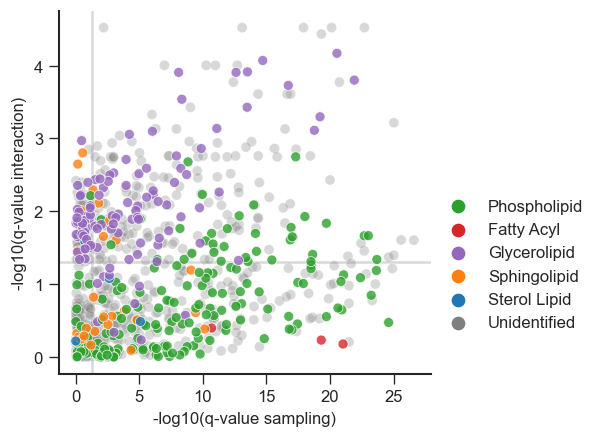

In [229]:
fig, ax = pval_pval_plot(x='log_qval_sampling', y='log_qval_sampling:ogtt', df=fc, _type='lipid')
ax.set_xlabel('-log10(q-value sampling)')
ax.set_ylabel('-log10(q-value interaction)')

Text(0, 0.5, '-log10(q-value interaction)')

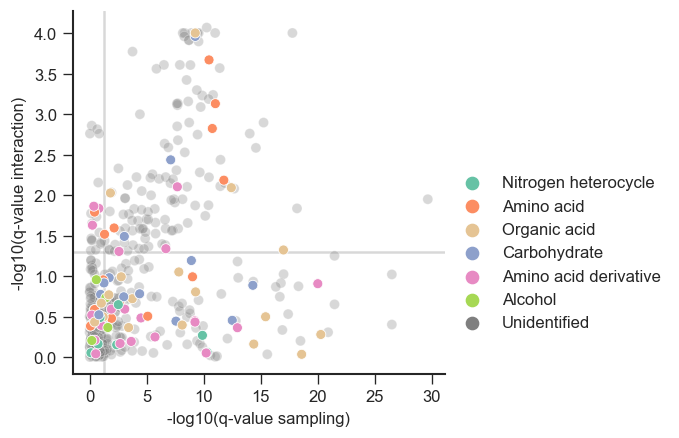

In [294]:
fig, ax = pval_pval_plot(x='log_qval_sampling', y='log_qval_sampling:ogtt', df=fc, _type='metabolite', alpha=1)
ax.set_xlabel('-log10(q-value sampling)')
ax.set_ylabel('-log10(q-value interaction)')

Text(0, 0.5, '-log10(q-value interaction)')

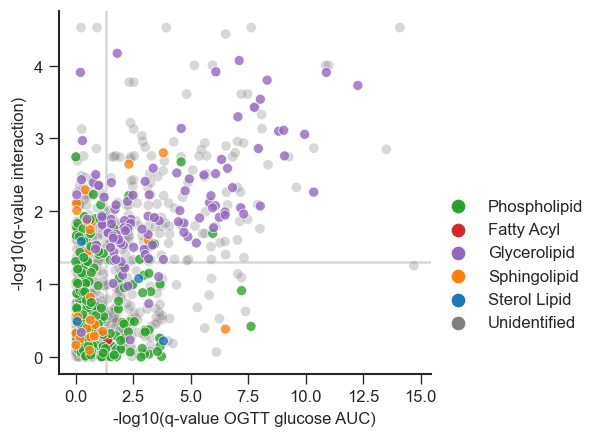

In [231]:
fig, ax = pval_pval_plot(x='log_qval_ogtt', y='log_qval_sampling:ogtt', df=fc, _type='lipid')
ax.set_xlabel('-log10(q-value OGTT glucose AUC)')
ax.set_ylabel('-log10(q-value interaction)')

Text(0, 0.5, '-log10(q-value interaction)')

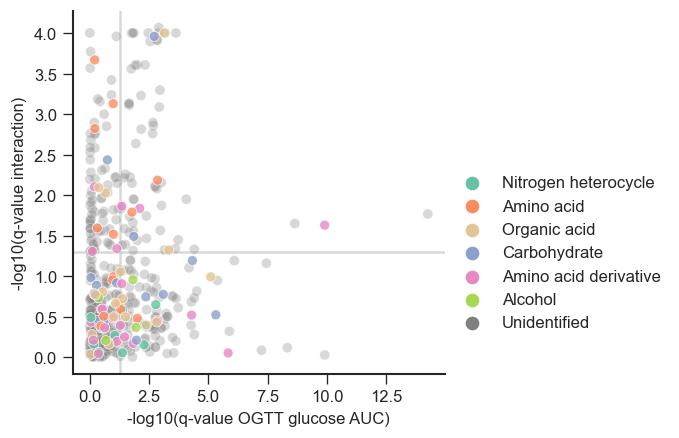

In [230]:
fig, ax = pval_pval_plot(x='log_qval_ogtt', y='log_qval_sampling:ogtt', df=fc, _type='metabolite')
ax.set_xlabel('-log10(q-value OGTT glucose AUC)')
ax.set_ylabel('-log10(q-value interaction)')